#### Pós Graduação de Engenharia de Software - PUC-Rio<br/>MVP da Disciplina/Sprint: Qualidade de Software, Segurança e Sistemas Inteligentes

---


# **Classificador de Enunciados de Questões de Vestibulares e Concursos**

### Aluno: Dirceu Cardoso Lemos Sobrinho

---

## Contextualização:
No MVP da disciplina Desenvolvimento Full Stack Básico foi desenvolvido uma API para manter questões de vestibulares e concursos, além de uma interface web para consulta e cadastro de questões, no entanto, uma das principais dificuldades ao cadastrar uma questão é classificá-la corretamente, visto que requer um conhecimento amplo do cadastrador de disciplinas e assuntos várias. Portanto nesse MVP testaremos a viabilidade de utilizar Machine Learning para classificar as questões.

### Dataset

O dataset foi construído a partir de pesquisa de questões do Enem das disciplinas de Português, Matemática, Biologia e de questões de concursos publicos de Direito e Informática.


---

1. Configuraçao:


In [337]:


# configuração para não exibir os warnings
import warnings
warnings.filterwarnings("ignore")

# Imports necessários
import pandas as pd
import numpy as np
#visualization
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns
# Machine Learning & Natural Language Processing
import re
 ## Natural Language Tool Kit
import nltk
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import TruncatedSVD
from sklearn.svm import SVC
from sklearn.feature_extraction.text import CountVectorizer


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Classes

In [338]:
class Carregador:

    def carregar_dados(self, url: str, atributos: list):
        dataset = pd.read_csv(url, names=atributos)
        return dataset


class PreProcessador:

    def pre_processar(self, x, y, percentual_teste = 0.2, seed=7):
        # divisão em treino e teste
        X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=percentual_teste, random_state=seed)
        return (X_train, X_test, Y_train, Y_test)


    def tratar_texto_linguagem_natural(self, texto_original):
        texto_lowercase=texto_original.lower()
        texto_sem_caracter_especial = re.sub("[^a-zA-Z \\\]"," ",texto_lowercase)
        palavras = nltk.word_tokenize(texto_sem_caracter_especial)

        stop_words = ["correto","afirmativa","questao","afirmativas","incorreto","incorretas","nao","seguintes","opcoes", "opcao",
                          "assinale","em","um","referese","os","as","seu","seus","tem","sao","leia","observe","qual","das","de","dos",
                          "assinalar", "se", "no", "na", "do","da","para", "uma", "um", "verdadeiro", "falso", "ii", "iii", "iv",
                          "preciso", "precisa", "atraves", "utilizam", "leia", "durante", "exemplo", "figura", "alternativas", "abaixo",
                          "refere", "ao", "contexto", "muito", "importante", "pois", "seguinte", "dentro", "fora", "antes", "depois",
                          "imagem", "oriundo", "oriundos", "aberto", "fechado", "abertos", "dispoe", "sobre", "sob", "abaixo", "acima",
                          "como", "novo", "nova", "por", "quer", "queria", "pratica", "qual", "condicao", "condicoes", "suponha",
                          "nesse", "nesses", "nessa", "nessas", "neste","nestes","nestas","nesta","essa","esse","essas","esses","pode",
                          "podem", "por", "para","possui","possuem","geral","geralmente","normal","normalmente","eventual","eventualmente",
                          "momento", "proximo","longe", "cujo", "cujos", "cujas", "cuja", "que", "quem", "quais", "apresenta","apresentou",
                          "especial", "especiais","mulher","homem","mulheres","meninos","meninas", "homens","menino", "menina", "praticamente",
                          "com", "contra", "mesmo", "mesma", "tendo", "cada", "ate", "bem", "mal", "bom", "entre", "significa"]

        enunciado_sem_stopwords = [palavra for palavra in palavras if not palavra in stop_words]
        return " ".join(enunciado_sem_stopwords)


class Modelo:

    def treinar_SVM(self, X_train, Y_train):
        # Cria e treina um modelo SVM
        modelo = SVC()
        modelo.fit(X_train, Y_train)
        return modelo


    def treinar_KNN(self, X_train, Y_train):
        # Cria e treina um modelo KNN
        modelo = KNeighborsClassifier()
        modelo.fit(X_train, Y_train)
        return modelo


    def treinar_CART(self, X_train, Y_train):
        # Cria e treina um modelo CART
        modelo = DecisionTreeClassifier()
        modelo.fit(X_train, Y_train)
        return modelo


    def treinar_NB(self, X_train, Y_train):
        # Cria e treina um modelo SVM
        modelo = GaussianNB()
        modelo.fit(X_train, Y_train)
        return modelo


class Avaliador:

    def avaliar_acuracia(self, modelo, X_test, Y_test):
        resultado =  cross_val_score(modelo, X_test, Y_test, cv=StratifiedKFold(n_splits=10, shuffle=True, random_state=7), scoring='accuracy')
        return resultado


class Visualizador:

    #Boxplot de comparação dos modelos
    def comparacao_modelos(self, nomes, resultados):
        fig = plt.figure(figsize=(15,10))
        fig.suptitle('Comparação dos Modelos')
        ax = fig.add_subplot(111)
        plt.boxplot(resultados)
        ax.set_xticklabels(nomes)
        plt.show()



## Execução do Programa


###Carregando o dataset

In [340]:
carregador = Carregador()
url_dados = ('https://raw.githubusercontent.com/dirceus/pos-grad-mvp2-modelo-classificador-questoes/main/datasets/dataset_questoes.csv')
atributos = ['enunciado','disciplina','id_disciplina']
dataset = carregador.carregar_dados(url_dados,atributos)

#imprime a quantidade de questões por disciplina do dataset
dataset.disciplina.value_counts()


MATEMATICA                                                225
PORTUGUES                                                 156
INFORMATICA                                               145
BIOLOGIA                                                  121
DIREITO                                                    70
disciplina                                                  1
 2. Transdução com vetor carregando o gene terapêutico      1
Name: disciplina, dtype: int64

###Pré-processamento

In [ ]:
pre_processador = PreProcessador()

lista_enunciados_tratados=[]
for enunciado in dataset.enunciado:
    enunciado_tratado = pre_processador.tratar_texto_linguagem_natural(enunciado)
    lista_enunciados_tratados.append(enunciado_tratado)


cou_vec=CountVectorizer(max_features=50000)
sparce_matrix=cou_vec.fit_transform(lista_enunciados_tratados).toarray()
all_words=cou_vec.get_feature_names_out()
print("Primeiras 50 palavras: ",all_words[0:50])

y = dataset.iloc[:,1].values
x= sparce_matrix

X_train, X_test, Y_train, Y_test = pre_processador.pre_processar(x, y)


Primeiras 50 palavras:  ['aaron' 'ab' 'aba' 'abal' 'abancado' 'abandonar' 'abandono' 'abastecer'
 'abastecido' 'abastecimento' 'abatidas' 'abatimento' 'abc' 'abdalla'
 'abdica' 'abel' 'abelha' 'abelhas' 'aberta' 'abertas' 'abertura' 'abnt'
 'abo' 'abocanhados' 'abolida' 'aborda' 'abordada' 'abordado' 'abordam'
 'abordar' 'abp' 'abr' 'abra' 'abrangem' 'abrangente' 'abre' 'abrem'
 'abri' 'abria' 'abril' 'abrir' 'abriu' 'abrolhos' 'abrupta' 'absentia'
 'absoluta' 'absolutas' 'absoluto' 'absor' 'absorver']


### Treinar modelos nos algoritimos SVM, CART, KNN e Naives-Bayes

In [ ]:
modelo = Modelo()

# Treinando os modelos e adicionando-os na lista de modelos
modelos = []
modelos.append(('KNN', modelo.treinar_KNN(X_train, Y_train)))
modelos.append(('CART', modelo.treinar_CART(X_train, Y_train)))
modelos.append(('NB', modelo.treinar_NB(X_train, Y_train)))
modelos.append(('SVM', modelo.treinar_SVM(X_train, Y_train)))

### Avaliar algoritmos treinados

In [ ]:
avaliador = Avaliador()

resultados = []
nomes_algoritmos = []

# Avaliação dos modelos
for v_nome, v_modelo in modelos:
    cv_results = avaliador.avaliar_acuracia(v_modelo, X_test, Y_test)
    resultados.append(cv_results)
    nomes_algoritmos.append(v_nome)
    msg = "%s: %f (%f)" % (v_nome, cv_results.mean(), cv_results.std())
    print(msg)



KNN: 0.263333 (0.057224)
CART: 0.540000 (0.147944)
NB: 0.782857 (0.112591)
SVM: 0.575714 (0.132317)


###Comparação de Modelos

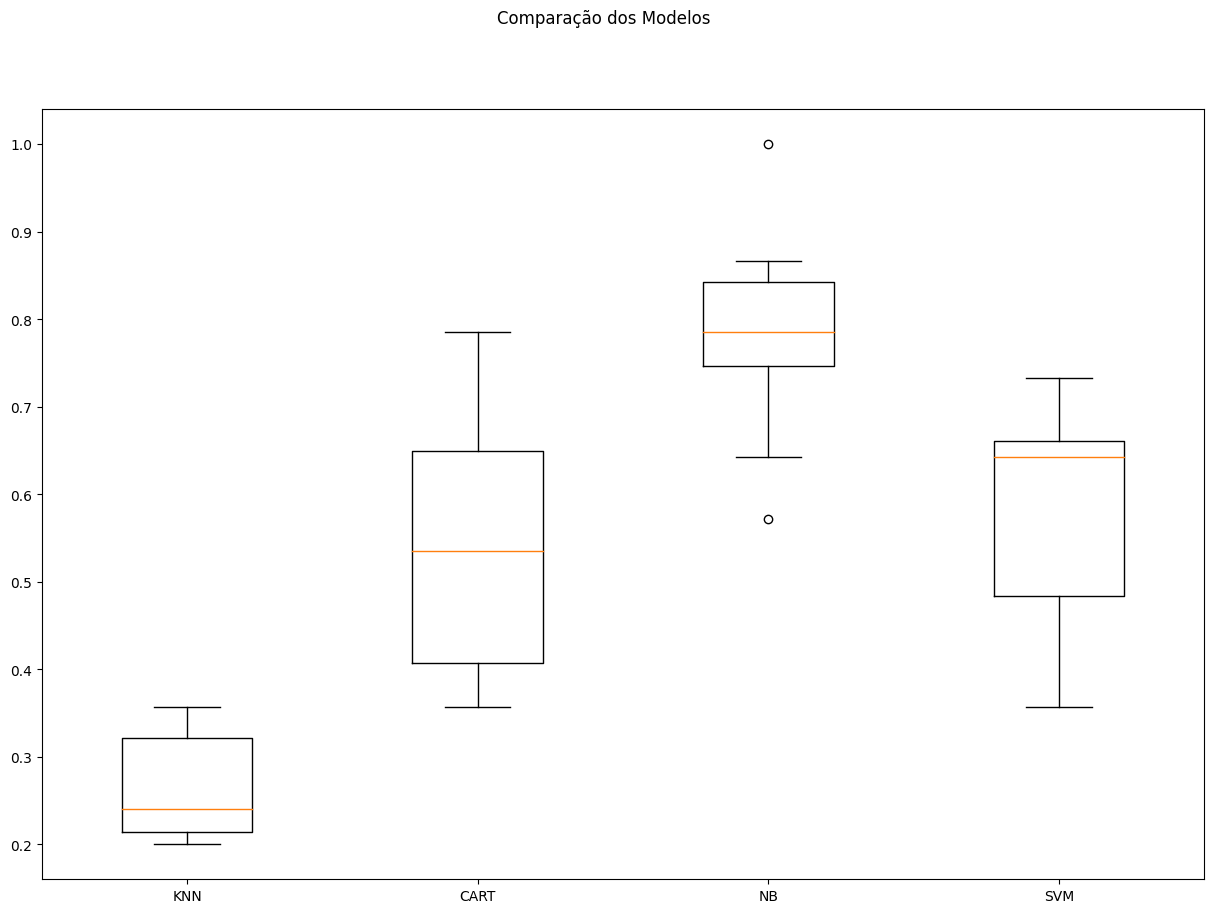

In [ ]:
visualizador = Visualizador()
visualizador.comparacao_modelos(nomes_algoritmos, resultados)



###Criação e avaliação de modelos: dados padronizados e normalizados

KNN-orig: 0.421 (0.036)
CART-orig: 0.746 (0.065)
NB-orig: 0.844 (0.042)
SVM-orig: 0.784 (0.047)
KNN-padr: 0.302 (0.108)
CART-padr: 0.772 (0.072)
NB-padr: 0.774 (0.048)
SVM-padr: 0.565 (0.041)
KNN-norm: 0.349 (0.065)
CART-norm: 0.760 (0.059)
NB-norm: 0.810 (0.037)
SVM-norm: 0.509 (0.054)


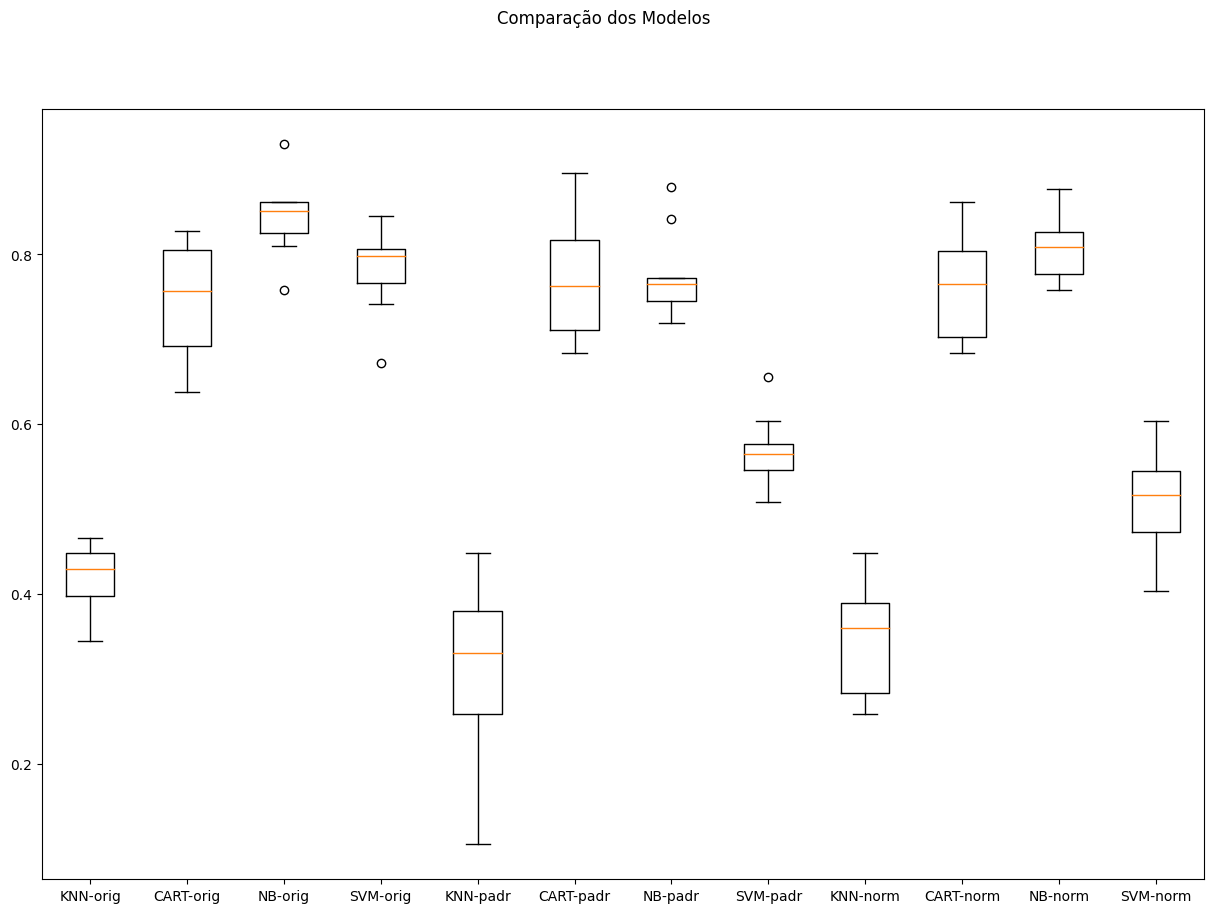

In [ ]:
np.random.seed(7) # definindo uma semente global para este bloco

# Listas para armazenar os armazenar os pipelines e os resultados para todas as visões do dataset
pipelines = []
results = []
names = []


# Criando os elementos do pipeline

# Algoritmos que serão utilizados
knn = ('KNN', KNeighborsClassifier())
cart = ('CART', DecisionTreeClassifier())
naive_bayes = ('NB', GaussianNB())
svm = ('SVM', SVC())

# Transformações que serão utilizadas
standard_scaler = ('StandardScaler', StandardScaler())
min_max_scaler = ('MinMaxScaler', MinMaxScaler())

# Montando os pipelines

# Dataset original
pipelines.append(('KNN-orig', Pipeline([knn])))
pipelines.append(('CART-orig', Pipeline([cart])))
pipelines.append(('NB-orig', Pipeline([naive_bayes])))
pipelines.append(('SVM-orig', Pipeline([svm])))

# Dataset Padronizado
pipelines.append(('KNN-padr', Pipeline([standard_scaler, knn])))
pipelines.append(('CART-padr', Pipeline([standard_scaler, cart])))
pipelines.append(('NB-padr', Pipeline([standard_scaler, naive_bayes])))
pipelines.append(('SVM-padr', Pipeline([standard_scaler, svm])))

# Dataset Normalizado
pipelines.append(('KNN-norm', Pipeline([min_max_scaler, knn])))
pipelines.append(('CART-norm', Pipeline([min_max_scaler, cart])))
pipelines.append(('NB-norm', Pipeline([min_max_scaler, naive_bayes])))
pipelines.append(('SVM-norm', Pipeline([min_max_scaler, svm])))

# Executando os pipelines
for name, model in pipelines:
    cv_results = avaliador.avaliar_acuracia(model, X_train, Y_train)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %.3f (%.3f)" % (name, cv_results.mean(), cv_results.std()) # formatando para 3 casas decimais
    print(msg)

# Boxplot de comparação dos modelos
visualizador.comparacao_modelos(names, results)

###Otimização dos hiperparâmetros

In [ ]:
# Tuning
np.random.seed(7) # definindo uma semente global para este bloco
pipelines = []

# Definindo os componentes do pipeline
nb = ('nb', GaussianNB())
#svm = ('svm', SVC())
standard_scaler = ('StandardScaler', StandardScaler())
min_max_scaler = ('MinMaxScaler', MinMaxScaler())

#pipelines.append(('svm-orig', Pipeline(steps=[svm])))
#pipelines.append(('svm-padr', Pipeline(steps=[standard_scaler, svm])))
#pipelines.append(('svm-norm', Pipeline(steps=[min_max_scaler, svm])))
pipelines.append(('nb-orig', Pipeline(steps=[nb])))
pipelines.append(('nb-padr', Pipeline(steps=[standard_scaler, nb])))
pipelines.append(('nb-norm', Pipeline(steps=[min_max_scaler, nb])))

#svm_param_grid = {'svm__C':[1,10,100,1000],'svm__gamma':[1,0.1,0.001,0.0001], 'svm__kernel':['linear','rbf']}
nb_param_grid = {'nb__priors': [None], 'nb__var_smoothing': [0.00000001, 0.000000001, 0.00000001]}
param_grid = nb_param_grid


# Prepara e executa o GridSearchCV
for name, model in pipelines:
    grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=StratifiedKFold(n_splits=10, shuffle=True, random_state=7), scoring='accuracy')
    grid.fit(X_train, Y_train)
    # imprime a melhor configuração
    print("Sem tratamento de missings: %s - Melhor: %f usando %s" % (name, grid.best_score_, grid.best_params_))

Sem tratamento de missings: nb-orig - Melhor: 0.843648 usando {'nb__priors': None, 'nb__var_smoothing': 1e-08}
Sem tratamento de missings: nb-padr - Melhor: 0.773926 usando {'nb__priors': None, 'nb__var_smoothing': 1e-08}
Sem tratamento de missings: nb-norm - Melhor: 0.810436 usando {'nb__priors': None, 'nb__var_smoothing': 1e-08}


### Finalização do Modelo

In [ ]:
# Avaliação do modelo com o conjunto de testes

# Preparação do modelo
scaler = StandardScaler().fit(X_train) # ajuste do scaler com o conjunto de treino
rescaledX = scaler.transform(X_train) # aplicação da padronização no conjunto de treino
#modeloFinal = SVC(C=10, gamma=0.001, kernel='rbf')
modeloFinal = GaussianNB(priors=None, var_smoothing=1e-08)
modeloFinal.fit(rescaledX, Y_train)
# Estimativa da acurácia no conjunto de teste
rescaledTestX = scaler.transform(X_test) # aplicação da padronização no conjunto de teste
predictions = modeloFinal.predict(rescaledTestX)
print(accuracy_score(Y_test, predictions))

0.8194444444444444


In [ ]:
# Preparação do modelo com TODO o dataset
scaler = StandardScaler().fit(x) # ajuste do scaler com TODO o dataset
rescaledX = scaler.transform(x) # aplicação da padronização com TODO o dataset
model.fit(rescaledX, y)

Pipeline(steps=[('MinMaxScaler', MinMaxScaler()), ('nb', GaussianNB())])

## Simulando a aplicação do modelo em dados não vistos

In [ ]:
#Novos dados - não sabemos a disciplina!

novo_dados = [
  #INFORMATICA
  pre_processador.tratar_texto_linguagem_natural("Acerca dos conceitos, das formas de uso e das ferramentas do ambiente Windows, julgue o item que se segue. O Explorador de Arquivos é a ferramenta do Windows utilizada para a navegação em arquivos da Internet."),
  pre_processador.tratar_texto_linguagem_natural("João resolveu organizar os seus arquivos através do explorador de arquivos do Windows. Ele acessou um determinado diretório de arquivos, selecionando os que gostaria de mover para a pasta “Imagens”. Dessa forma, foi capaz de agrupar os arquivos de imagem em um único local, facilitando, assim, o acesso e a organização. Qual é o procedimento correto para selecionar aleatoriamente arquivos em um diretório usando o explorador de arquivos?"),
  pre_processador.tratar_texto_linguagem_natural("A realização de backup no Sistema Operacional Windows é uma prática fundamental para proteger dados e garantir a recuperação de informações em caso de falhas. Esses procedimentos de backup permitem"),
  #PORTUGUES
  pre_processador.tratar_texto_linguagem_natural("Caminhando contra o vento, Sem lenço e sem documento No sol de quase dezembro Eu vou O sol se reparte em crimes Espaçonaves, guerrilhas Em cardinales bonitas Eu vou Em caras de presidentes Em grandes beijos de amor Em dentes, pernas, bandeiras Bombas e Brigitte Bardot O sol nas bancas de revista Me enche de alegria e preguiça Quem lê tanta noticia Eu vou VELOSO, C. Alegria, alegria In Caetano Veloso. São Paulo. Philips. 1967 (fragmento). É comum coexistirem sequências tipológicas em um mesmo gênero textual. Nesse fragmento, os tipos textuais que se destacam na organização temática são"),
  pre_processador.tratar_texto_linguagem_natural("Leia: “Como, minha senhora? A senhora não acredita que Vinicius seja uma porção? Azar o seu, dona. Um dia ainda se fará um programa de televisão com Vinicius ao violão, acompanhando outro Vinicius que canta, junto com um quarteto vocal de Vinicius. Sem videoteipe.” (10º§) As expressões em destaque, sintaticamente, podem ser classificadas como:"),
  #MATEMATICA
  pre_processador.tratar_texto_linguagem_natural("O gráfico apresenta a evolução do crescimento de uma determinada árvore, plantada a partir de uma muda com 1 metro de altura. Nessa evolução, a altura da árvore, em metro, é descrita em função do tempo, medido em ano. Imagem associada para resolução da questão No período de 1 ano, contado a partir do instante em que a árvore tinha dois anos e meio de plantio, a variação da altura dessa árvore, em metro, teve valor compreendido entre"),
  pre_processador.tratar_texto_linguagem_natural("Sobre um grupo de atletas sabe-se que 15 praticam natação, atletismo e ciclismo, 20 praticam somente natação e atletismo, 27 praticam somente natação e ciclismo, e 25 praticam somente atletismo e ciclismo. Se 70 atletas desse grupo praticam natação, 61 praticam atletismo, e 75 praticam ciclismo, então é verdade que, das alternativas a seguir, a que contém a porcentagem que mais se aproxima da relação entre o número de atletas que praticam um único esporte o número total de atletas desse grupo é"),
  #DIREITO
  pre_processador.tratar_texto_linguagem_natural("Conforme preconizado pelos princípios constitucionais, a atuação dos servidores públicos deve ser pautada pela conduta moral e ética, sendo vedado qualquer tipo de discriminação por sexo, raça, cor, idade ou qualquer outra forma discriminatória. O atendimento ao cidadão deve ser realizado de forma humanizada. A ação do servidor público deve ocorrer de forma igualitária, com dignidade e respeito. Assinale a alternativa que relaciona corretamente dois dos princípios constitucionais que embasam as afirmações anteriores."),
  pre_processador.tratar_texto_linguagem_natural("A Constituição Federal prevê como funções essenciais à administração da Justiça o Ministério Público, a Advocacia pública e privada, estabelecendo que"),
  #BIOLOGIA
  pre_processador.tratar_texto_linguagem_natural("No ciclo celular atuam moléculas reguladoras. Dentre elas, a proteína p53 é ativada em resposta a mutações no DNA, evitando a progressão do ciclo até que os danos sejam reparados, ou induzindo a célula à auto destruição. A ausência dessa proteína poderá favorecer a:"),
  pre_processador.tratar_texto_linguagem_natural("O tipo de reprodução assexuada que se caracteriza pela ocorrência de várias divisões do núcleo celular sem que haja divisão imediata do citoplasma, é denominada de")
]

cou_vec_test  = CountVectorizer(vocabulary=all_words)
X_novos_dados = cou_vec_test.fit_transform(novo_dados)


entrada = pd.DataFrame(X_novos_dados.toarray(), columns=all_words)

array_entrada = entrada.values
X_entrada = array_entrada[:,0:50000].astype(float)

# Padronização nos dados de entrada usando o scaler utilizado em X
rescaledEntradaX = scaler.transform(X_entrada)
print(rescaledEntradaX)


[[-0.03731967 -0.06472978 -0.05999804 ... -0.07093765 -0.03731967
  -0.03731967]
 [-0.03731967 -0.06472978 -0.05999804 ... -0.07093765 -0.03731967
  -0.03731967]
 [-0.03731967 -0.06472978 -0.05999804 ... -0.07093765 -0.03731967
  -0.03731967]
 ...
 [-0.03731967 -0.06472978 -0.05999804 ... -0.07093765 -0.03731967
  -0.03731967]
 [-0.03731967 -0.06472978 -0.05999804 ... -0.07093765 -0.03731967
  -0.03731967]
 [-0.03731967 -0.06472978 -0.05999804 ... -0.07093765 -0.03731967
  -0.03731967]]


In [ ]:
saidas = model.predict(rescaledEntradaX)
esperados = ["INFORMATICA", "INFORMATICA", "INFORMATICA", "PORTUGUES", "PORTUGUES", "MATEMATICA", "MATEMATICA", "DIREITO", "DIREITO", "BIOLOGIA", "BIOLOGIA"]
print("Resultado:")

contador = 0
for saida in saidas:
    print("Resultado: "+saida + " - Esperado: " + esperados[contador])
    contador += 1


Resultado:
Resultado: INFORMATICA - Esperado: INFORMATICA
Resultado: INFORMATICA - Esperado: INFORMATICA
Resultado: BIOLOGIA - Esperado: INFORMATICA
Resultado: PORTUGUES - Esperado: PORTUGUES
Resultado: PORTUGUES - Esperado: PORTUGUES
Resultado: MATEMATICA - Esperado: MATEMATICA
Resultado: PORTUGUES - Esperado: MATEMATICA
Resultado: DIREITO - Esperado: DIREITO
Resultado: PORTUGUES - Esperado: DIREITO
Resultado: BIOLOGIA - Esperado: BIOLOGIA
Resultado: PORTUGUES - Esperado: BIOLOGIA


#Conclusão

Dos 11 novos enunciados que foi avaliado, o sistema errou 4 sendo que desses 3 foram classificados com a disciplina Português, vendo a necessidade de tratar melhor os dados dessa displina visto os enunicados são textos longos de diversos assuntos.